<a href="https://colab.research.google.com/github/jcmachicao/deeplearning_gestionpublica/blob/main/austin_crime_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de data para el crimen en Austin (TX)

El objetivo de hacer un análisis exploratorio de datos (EDA) es lograr generar un np.array listo para el entrenamiento de una red neuronal.

In [ ]:
!pip install plotly-express

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import os

In [ ]:
ruta = 'drive/My Drive/00 Modelos Principales/modelos/austin_crime/'
os.listdir(ruta)

['austin_crime_eda.ipynb',
 'austin_crime_data200.xlsx',
 'preds_austin_clas_v4.gsheet',
 'gdmk_nn_load_clas_final.ipynb',
 'pred_austin_clas_v6__.xlsx',
 'modelo_austin_clas_v4.pth',
 'preds_austin_clas_v4.csv',
 'errors_austin_clas_v4.csv',
 'prec_df.csv',
 'data300.xlsx',
 'predicciones.xlsx',
 'austin_crime.xlsx',
 'y_np.npy',
 'X_np.npy',
 'austin_crime_data210.xlsx',
 'modelo_austin_clas_v6.pth',
 'preds_austin_clas_v6.csv',
 'errors_austin_clas_v6.csv',
 'predic__austin_clas_v6.csv']

In [ ]:
data_crime = pd.read_excel(ruta + 'austin_crime.xlsx')

In [ ]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75553 entries, 0 to 75552
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   address                75553 non-null  object        
 1   census_tract           75553 non-null  object        
 2   clearance_date         75553 non-null  datetime64[ns]
 3   clearance_status       75553 non-null  object        
 4   council_district_code  75491 non-null  float64       
 5   description            75553 non-null  object        
 6   district               75553 non-null  object        
 7   location_description   74596 non-null  object        
 8   timestamp              70019 non-null  datetime64[ns]
 9   unique_key             70019 non-null  float64       
 10  x_coordinate           69061 non-null  float64       
 11  y_coordinate           69061 non-null  float64       
 12  year                   70019 non-null  float64       
 13  z

# Plan de data
* data100 : Data orignal limpia y enfocada
* data200 : Data transformada y recortada para entrenamiento
* data300 : Data para modelamiento de algoritmo (ejemplo red neuronal) convertida a dummies de categorías

In [ ]:
data100 = data_crime.drop(['address', 'council_district_code', 'location_description', 'timestamp', 'unique_key', 
                           'x_coordinate', 'y_coordinate', 'zipcode', 'location', 'year'], axis=1).dropna()

In [ ]:
data100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33240 entries, 2 to 75552
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   census_tract      33240 non-null  object        
 1   clearance_date    33240 non-null  datetime64[ns]
 2   clearance_status  33240 non-null  object        
 3   description       33240 non-null  object        
 4   district          33240 non-null  object        
 5   latitude          33240 non-null  float64       
 6   longitude         33240 non-null  float64       
 7   primary_type      33240 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ MB


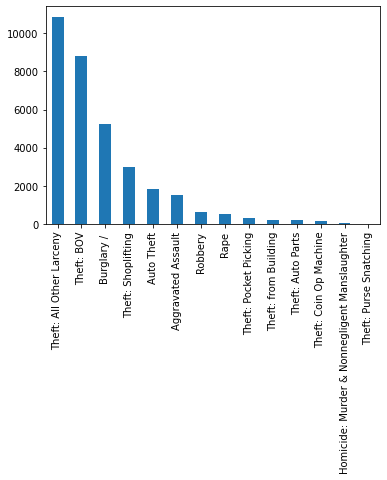

In [ ]:
data100.primary_type.value_counts().plot(kind='bar')

Si bien es cierto la primera opción es probablemente la más importante, es posible que nuble el resto de categorías. También es interesante que las categorías sean lo más interpretables posible. Esta es la razón por la que se elige las categorías entre "Theft: Shoplifting" y "Theft: Pocket Picking"

In [ ]:
tipos_sel = list(data100.primary_type.value_counts()[3:9].index)
tipos_sel

['Theft: Shoplifting',
 'Auto Theft',
 'Aggravated Assault',
 'Robbery',
 'Rape',
 'Theft: Pocket Picking']

In [ ]:
data110 = data100[data100.primary_type.isin(tipos_sel)]
data110.shape

(7782, 8)

In [ ]:
data110.primary_type.unique()

array(['Theft: Shoplifting', 'Auto Theft', 'Aggravated Assault',
       'Robbery', 'Theft: Pocket Picking', 'Rape'], dtype=object)

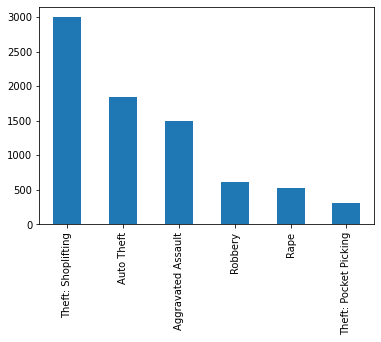

In [ ]:
data110.primary_type.value_counts().plot(kind='bar')

In [ ]:
hour_census, month_census = [], []

for dat in data110.census_tract:
  hour_census.append(dat.hour)

for dat in data110.clearance_date:
  month_census.append(dat.month)

data110['hour_census'] = np.array(hour_census).astype(int)
data110['month_census'] = np.array(month_census).astype(int)
data110.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 2 to 75549
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   census_tract      7782 non-null   object        
 1   clearance_date    7782 non-null   datetime64[ns]
 2   clearance_status  7782 non-null   object        
 3   description       7782 non-null   object        
 4   district          7782 non-null   object        
 5   latitude          7782 non-null   float64       
 6   longitude         7782 non-null   float64       
 7   primary_type      7782 non-null   object        
 8   hour_census       7782 non-null   int64         
 9   month_census      7782 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 668.8+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



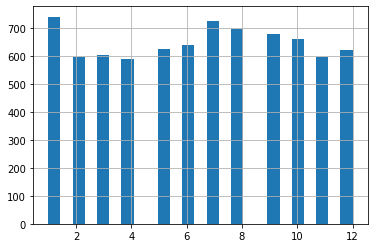

In [ ]:
data110.month_census.hist(bins=25)

In [ ]:
fig = px.scatter_mapbox(data110.sort_values(by=['month_census']), lat='latitude', lon='longitude', 
                        color='primary_type',
                        #facet_row='month_census',
                        #marginal_y='violin',
                        animation_frame='month_census',     
                        mapbox_style='carto-positron', width=800, height=800
                        )
fig.show()

In [ ]:
fig = px.scatter(data110.sort_values(by=['month_census']), x='latitude', y='longitude', 
                        color='primary_type',
                        facet_col='month_census',
                        facet_row='primary_type',
                        #marginal_x='violin',    
                        width=3000, height=1000,
                        #animation_frame='month_census',
                        )
fig.show()

In [ ]:
data120 = data110.drop(['census_tract', 'clearance_date'], axis=1)
data120.shape

(7782, 8)

In [ ]:
data120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 2 to 75549
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clearance_status  7782 non-null   object 
 1   description       7782 non-null   object 
 2   district          7782 non-null   object 
 3   latitude          7782 non-null   float64
 4   longitude         7782 non-null   float64
 5   primary_type      7782 non-null   object 
 6   hour_census       7782 non-null   int64  
 7   month_census      7782 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 547.2+ KB


In [ ]:
data120.to_excel(ruta + 'austincrime__data100.xlsx')

In [ ]:
# Conversión a Dummies
data120.description.value_counts()

THEFT BY SHOPLIFTING              2995
AUTO THEFT                        1841
AGG ASSAULT                        453
AGG ASLT STRANGLE/SUFFOCATE        414
RAPE                               340
AGG ASSAULT FAM/DATE VIOLENCE      324
AGG ROBBERY/DEADLY WEAPON          308
THEFT FROM PERSON                  305
ROBBERY BY ASSAULT                 245
AGG ASLT ENHANC STRANGL/SUFFOC     134
AGG RAPE OF A CHILD                105
DEADLY CONDUCT                      81
RAPE OF A CHILD                     71
ROBBERY BY THREAT                   53
AGG ASSAULT WITH MOTOR VEH          40
AGG ASLT W/MOTOR VEH FAM/DAT V      30
AGG RAPE                            13
AGG ROBBERY BY ASSAULT              11
AGG ASSAULT ON PUBLIC SERVANT       10
TAKE WEAPON FRM POLICE OFFICER       7
DEADLY CONDUCT FAM/DATE VIOL         2
Name: description, dtype: int64

In [ ]:
desc_agg = []
for d in data120.description:
  if 'AGG ' in d:
    desc_agg.append('AGG')
  elif 'DEADLY ' in d:
    desc_agg.append('DEADLY')
  else:
    desc_agg.append('STANDARD')
data120['desc_agg'] = desc_agg
data120.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 2 to 75549
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   clearance_status  7782 non-null   object 
 1   description       7782 non-null   object 
 2   district          7782 non-null   object 
 3   latitude          7782 non-null   float64
 4   longitude         7782 non-null   float64
 5   primary_type      7782 non-null   object 
 6   hour_census       7782 non-null   int64  
 7   month_census      7782 non-null   int64  
 8   desc_agg          7782 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 608.0+ KB


In [ ]:
data120.columns

Index(['clearance_status', 'description', 'district', 'latitude', 'longitude',
       'primary_type', 'hour_census', 'month_census', 'desc_agg'],
      dtype='object')

In [ ]:
data_y = data120.primary_type

In [ ]:
data120 = data120.drop(['description', 'primary_type'], axis=1)
data130 = pd.get_dummies(data120, columns=['clearance_status', 'district', 'hour_census', 'month_census', 'desc_agg'], drop_first=True)
data130.shape

(7782, 46)

In [ ]:
data200 = data130

In [ ]:
data_cols = pd.DataFrame(list(data200.columns.T))

In [ ]:
with pd.ExcelWriter(ruta + 'austin_crime_data200.xlsx') as writer:
  data200.to_excel(writer, sheet_name='data')
  data_cols.to_excel(writer, sheet_name='columnas')
  data_y.to_excel(writer, sheet_name='data_y')

In [ ]:
lat_min, lat_max, lon_min, lon_max = np.min(data200.latitude), np.max(data200.latitude), np.min(data200.longitude), np.max(data200.longitude)

In [ ]:
d_lat = lat_max-lat_min
d_lon = lon_max-lon_min
d_lat, d_lon

(0.4244540000000008, 0.29912799999999606)

In [ ]:
lat_tr = (data200.latitude-lat_min)/d_lat
lon_tr = (data200.longitude-lon_min)/d_lon
data200['lat_tr'] = lat_tr
data200['lon_tr'] = lon_tr

In [ ]:
data210 = data200.drop(['latitude', 'longitude'], axis=1)

In [ ]:
data210.to_excel(ruta + 'austin_crime_data210.xlsx')

In [ ]:
y_fact = pd.factorize(data_y)
y_np_orig = y_fact[0]
y_np_cats = y_fact[1]

In [ ]:
y_np_orig.shape

(7782,)

In [ ]:
y_np_cats

Index(['Theft: Shoplifting', 'Auto Theft', 'Aggravated Assault', 'Robbery',
       'Theft: Pocket Picking', 'Rape'],
      dtype='object')

In [ ]:
X_np_orig = np.array(data210)

In [ ]:
X_np_orig.shape

(7782, 46)

In [ ]:
np.save(ruta + 'X_np.npy', X_np_orig)
np.save(ruta + 'y_np.npy', y_np_orig)